# Preprocessing

In [1]:
import sys
sys.path.append('/mnt/5e85af0b-fa6b-4dca-a539-449bff7060b4/Courses/NLP/resources/other/arabic-sentiment-analysis-master/')

In [2]:
import matplotlib.pyplot as plt
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
import re
import elements
import string
import emoji
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/amr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

In [4]:
test = '   أحتاج أن أري   الكًَثـــير. من الأشيــــاء    @و , '

In [5]:
def tashkel_removal(t):
    return t.translate(t.maketrans('',"",''.join(elements.DIACRITICS)))

In [6]:
def tatweel_removal(t):
    return re.sub('ـ+', '',t)

In [7]:
def normalization(t):
    return t.translate(t.maketrans(''.join(elements.ALEF_HAMZA_FORMS+elements.NON_ALIF_HAMZA_FORMS),"اااوي"))

In [8]:
def stopwords_removal(t,stop=arb_stopwords):
    return ' '.join([word for word in t.split() if word not in stop])

In [9]:
def successive_space_removal(t):
    t=t.strip()
    return re.sub(' +', ' ',t)

In [10]:
def punctuation_removal(t):
    return t.translate(t.maketrans('',"",''.join(elements.PUNCTUATION_MARKS[:-1])+'?'))

In [11]:
def emojify(t):
    return emoji.demojize(t)

### Stemmers

In [12]:
def stemmer(t, stemming_function):
    return stemming_function(t)

##### Farasa

In [13]:
segmenter = FarasaSegmenter()

In [30]:
segmenter.segment(test)

In [33]:
a.split('+')

['أحتاج أن أرى ال', 'كثير . من ال', 'أشياء @و ,']

##### Tachafyne

In [19]:
import pyarabic.arabrepr
arepr = pyarabic.arabrepr.ArabicRepr()
repr = arepr.repr
from tashaphyne.stemming import ArabicLightStemmer

In [20]:
tach_st = ArabicLightStemmer()

In [21]:
#It doesn't work with string sentence
tach_st.light_stem(test)

'   أحتاج أن أري   الكثـــير. من الأشيــــاء    @و , '

In [23]:
#Result doesn't look acurate
[tach_st.light_stem(i) for i in test.split()]

['حتاج', 'أن', 'ري', 'الكثـــير.', 'من', 'الأشيــــاء', '@و', ',']

##### ASSEM

In [25]:
pip install snowballstemmer

     |████████████████████████████████| 93 kB 473 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
from snowballstemmer import stemmer

In [27]:
assem_st = stemmer("arabic")

In [28]:
assem_st.stemWord(test)

'   احتاج ان اري   الكثير. من الاشياء    @و , '

In [29]:
#Result doesn't look acurate
[assem_st.stemWord(i) for i in test.split()]

['احتاج', 'ان', 'ار', 'كثير.', 'من', 'اشياء', '@و', ',']

##### NLTK

In [21]:
from nltk.stem.isri import ISRIStemmer

In [22]:
nltk_st = ISRIStemmer()

In [23]:
nltk_st.stem(test)

'   أحتاج أن أري   الكثـــير من الأشيــــاء    @و , '

##### فاصل

In [24]:
prep = [stopwords_removal,tashkel_removal,tatweel_removal,punctuation_removal,
        normalization,emojify,successive_space_removal]

In [25]:
def process(text,prep=prep):
    for i in prep:
        text=i(text)
    return text

## Data 

In [26]:
import numpy as np
import pandas as pd
import os
import time

In [9]:
path = '../resources/other/arabic-sentiment-analysis-master/arabic_tweets_txt/'

In [35]:
files = os.listdir(path)

In [36]:
def read(i,files):
    return pd.read_csv(f'{path}/{files[i]}',sep='\t',names=['tweet'])

In [37]:
#Data is already separated based on label
train_pos,train_neg , val_pos,val_neg= pd.concat([read(1,files),read(2,files)]).values,read(4,files).values,read(3,files).values,read(6,files).values

### Stemmer Analysis

In [56]:
temp = pd.DataFrame(train_pos,columns=['text']).text

In [38]:
stemmers = [farasa_st.stem,tach_st.light_stem,assem_st.stemWord,nltk_st.stem]

In [58]:
t_e=[]
for i in range(len(stemmers)):
    s=time.time()
    temp[:5].apply(stemmers[i])
    e=time.time()
    t_e.append(e-s)

<BarContainer object of 4 artists>

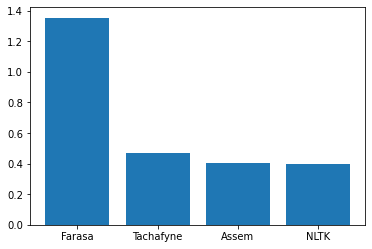

In [59]:
plt.bar(['Farasa','Tachafyne','Assem','NLTK'],np.power(t_e,1/8))